In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#***INTRODUCTION***

*Data Analysis and Visualization: Netflix Data*

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix as of mid-2021.

***Description of details in Dataset:-***

1.**show_id(discrere):** A unique identifier for each show or movie.

2.**type(nominal):** The type of content, either "Movie" or "TV Show."

3.**title(nominal):** The title of content.

4.**director(nominal):** The director of the movie or TV show.

5.**cast(nominal):** The cast or actors in the movie or TV show.

6.**country(nominal):** The country where the movie or TV show is associated with.

7.**date_added(ordinal):** The date when the content was added to the streaming platform, in the format "Month Day, Year."

8.**release_year(ordinal):** The year the movie or TV show was originally released.

9.**rating(ordinal):** The content's rating, which indicates the recommended audience age or maturity level.

10.**duration:** The duration of the movie or TV show.

   The **duration(continous)** is given in minutes e.g ("90 min").
    
   Also **duration(discrete)** is given in
   number of seasons e.g ("2 Seasons" and "1 Season").

11.**listed_in(nominal):** The genre or category, which can help classify content.

12.**description(nominal):** A brief description of the movie or TV show, providing an overview of the plot or subject matter.







In [2]:
#importing some of libraries in colab
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#Loading Dataset
nt=pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")

*Using functions/methods for inspecting the structure, content, and summary statistics of a DataFrame in pandas.*

In [5]:
#fetch first 5 entries of dataset
nt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#fetch statistical description of the dataset columns
#passing "include=All" to include data type attributes
nt.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
#fetch number of rows ,columns and element in dataset
print("Number of columns present:",nt.shape[0])
print("Number of rows present:",nt.shape[1])
print("Number of elements present:",nt.size)

Number of columns present: 8807
Number of rows present: 12
Number of elements present: 105684


# EDA

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Query.1**-Load the dataset and print the complete information of the dataset and name the columns that has missing value

In [7]:
#fetch brief summary of dataframe like column,memory,index count,data type
print(nt.info())
print()
#fetching and storing columns names with null value in dataframe
missing_column=nt[nt.columns[nt.isnull().any()]]

#using for loop to print indexes name in rows with null_count percentage
print("Sr. Name    Percent")
sr_n=0
for i in missing_column:
  sr_n += 1
  null_pct = nt[i].isnull().sum()/len(nt)*100
  print(f"{sr_n}-  {i}-  {round(null_pct,2)}%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Sr. Name    Percent
1-  director-  29.91%
2-  cast-  9.37%
3-  country-  9.44%
4-  date_added-  0.11%
5-  rating-  0.05%
6-  duration-  0.03%


***OBSERVATION***

Dataset contain 8807 rows and 12 columns.

Total 6 columns(*director, cast, country, date_added, rating, duration*)have  **missing** values.Column name *director* with highest **29.9%** null_rate and *duration* with lowest **0.03%** null_rate.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**QUERY.2-**Load the dataset and print the top 10 countries contributing to the Content on Netflix

                country
United States      2818
India               972
United Kingdom      419
Japan               245
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Egypt               106



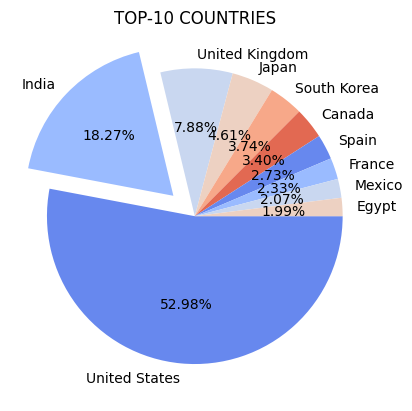

In [9]:
#(.value_counts()) method fetch unique count of value,by default in descending order
top10_country=pd.DataFrame(nt["country"].value_counts().head(10))
print(top10_country)
print()

#plotting pie chart to observe contribution of top10 in percentage
ex=(0,0.2,0,0,0,0,0,0,0,0)
plt.pie(top10_country["country"],labels=top10_country["country"].index,autopct="%1.2f%%",
        colors=sns.color_palette("coolwarm"),counterclock=False,explode=ex)
plt.title("TOP-10 COUNTRIES")
plt.show()

***OBSERVATION***

We can observe that *United states, India* contribute **60%** of top10 countries.

United states with nearly 53% contribution at top and Egypt with almost 2% contribution at 10th place among top10 countries.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**QUERY.3-**Load the dataset and list the 5 most popular types of genre on the platform

In [11]:
nt["listed_in"].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

***PART-1***

The total count of specific combination of genre present in dataset is:- 514


TOP_5 MOST POPULAR GENRE ARE:-
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: listed_in, dtype: int64



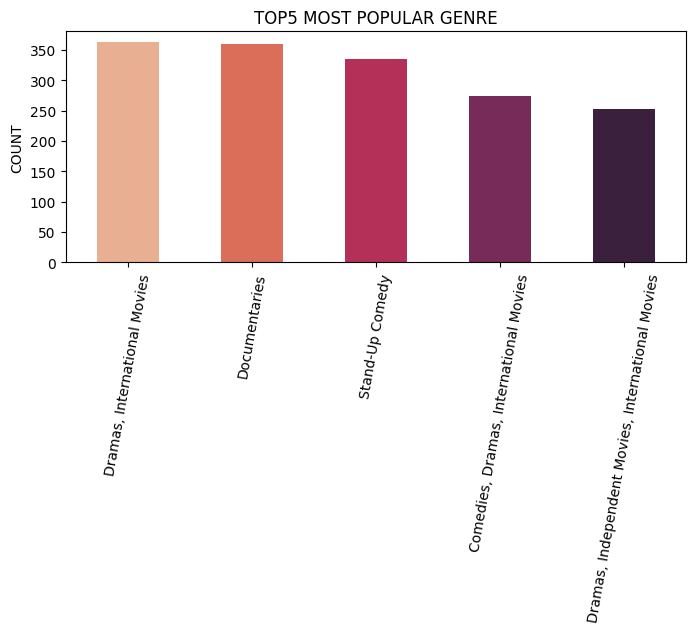

In [ ]:
#calculating number of specific combination of genre assocaited with content in dataset
print("The total count of specific combination of genre present in dataset is:-",nt["listed_in"].nunique())
print()
#fetching top5 popular listed_in(genre) using .value_counts() method
print()
top5_genre=nt["listed_in"].value_counts().head()
print("TOP_5 MOST POPULAR GENRE ARE:-")
print(top5_genre)
print()

#plotting barplot to visulazie and compare top5 specific combined genre
#using seaborn to plot graph
plt.figure(figsize=(8,3))
sns.barplot(x=nt["listed_in"].value_counts().head().index,
            y=nt["listed_in"].value_counts().head().values,
            width=0.5,
            palette="rocket_r")
plt.title("TOP5 MOST POPULAR GENRE")
plt.ylabel("COUNT")
plt.xticks(rotation=80)                                             #(.xticks) allow to modify appearance by altering loction and appearrance of x-axis labels
plt.show()

***OBSERVATION***

The most common types of genre under which **362** number of content(***movies or TVshows***) falls is  --**Dramas, International Movies**--

The total count of unique combination of genre in netflix dataset is **514**



***PART-2***

Total number of genre:- 42

TOP_5 MOST POPULAR UNIQUE GENRE ARE:-

International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: listed_in, dtype: int64



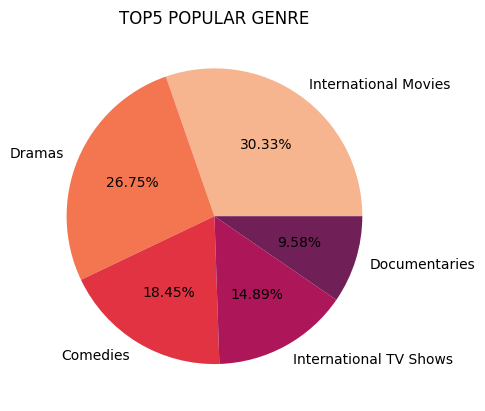

In [20]:
#(value_counts and split("," as seperators) method to get the value and value_count of required column to obtain unique types of genre
#.explode() method to convert obtain list form output into rows
print("Total number of genre:-",len(nt["listed_in"].str.split(", ").explode().unique()))
print()
top_genre=nt["listed_in"].str.split(", ").explode().value_counts().head()
#transform into dataframe
pd.DataFrame(top_genre)
print("TOP_5 MOST POPULAR UNIQUE GENRE ARE:-")
print()
print(top_genre)
print()

#using seaborn to plot bar graph of unique genre
plt.pie(top_genre,labels=top_genre.index,autopct="%1.2f%%",
        colors=sns.color_palette("rocket_r"))
plt.title("TOP5 POPULAR GENRE")
plt.show()

**OBSERVATION**

"*Internatinal movies*" type of genre have highest content count of 2752 and with 30% contribution of top_genre

we can see that **'Internatinal movies and  Dramas'** both contribute more than  **25%** individually of top_genre

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**QUERY.4-** Load the Dataset and categorize into TV shows and Movies and display 2 rows for each.

In [ ]:
#fecthing and storing first 2 rows where type is eaqual to TVshow ,Movies
movies=nt[nt["type"]=="Movie"].head(2)
print("First 2 entries where type is Movies\n")
movies

First 2 entries where type is Movies



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [ ]:
tv_show=nt[nt["type"]=="TV Show"].head(2)
print("First 2 entries where type is TV Show\n")
tv_show

First 2 entries where type is TV Show



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


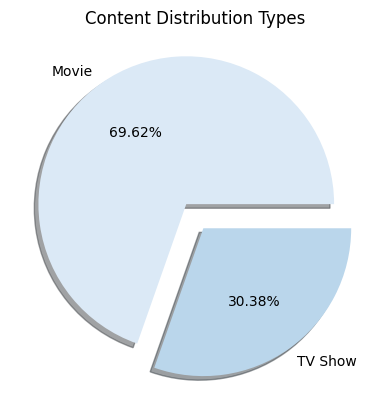

In [ ]:
#(.value_counts()) method of pandas
#calculates the occurence of unique value in column "type" of dataframe
#matplot pie will plot a chart based on count of distribution
types=nt["type"].value_counts()
plt.pie(types,labels=types.index,autopct="%1.2f%%",
        shadow=True,explode=(0.1,0.1),colors=sns.color_palette("Blues"))
plt.title("Content Distribution Types")
plt.show()

***OBSERVATION***

There are two **types** of content in dataset i.e, "**TV Shows and Movies**"

Nearly 70% of content type  are "**Movies**" and rest is "**TV Shows**"

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**QUERY.5-**Load the Dataset and find the Oldest movies

In [ ]:
#fetching oldest 5 content where type is movie
#sort_values method by default fetch in scending order

print("5 Entries of oldest movies is:-\n")
nt[nt["type"] == "Movie"].sort_values("release_year").head()

5 Entries of oldest movies is:-



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...


In [ ]:
#fetching first 5 entries for oldest content in given data
nt.sort_values("release_year").head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**QUERY.6-**
Load the Dataset and get the count of values for duration column.

In [ ]:
#count of values for feature name "duration" and displaying it as dataframe
pd.DataFrame(nt["duration"].value_counts().reset_index())

,index,duration
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,90 min,152
4,94 min,146
...,...,...
215,16 min,1
216,186 min,1
217,193 min,1
218,189 min,1


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**QUERY.7-**Load the Dataset and find the measures of central tendency and dispersion of duration column by extracting  numerical part of the duration column.

In [13]:
#since given attribute "duration" is readed as object in python
#we exract and save  the numerical part of element for statistical calculation

#(.describe()) provide statistical summary of attribute
#(.astype()) changes the data type of str value to float type

#"\d" regular expression passed as pattern represent the digit from 0 to 9
#'(\d+)' help in extracting a specific group of pattern with one or more value from dataset

nt["num_duration"]=nt["duration"].str.extract("(\d+)").astype(float)
nt["num_duration"].describe()

count    8804.000000
mean       69.846888
std        50.814828
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: num_duration, dtype: float64

**Observation**

We can observe the mean of duration is nearly 70 minutes where the standard deviation is 50.

We also observe the maximum value coming out 312 and the median value is 88.

Yet, We cannot define the actual unit of these values since the **Type** of content we have **Movie** and **TVshow**,in the TVshow it is not clear whether it is showing the number of season, number of hours, number of episodes, so it cannot be concluded precisely.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**QUERY.8-**Load the Dataset and find out to which country the highest duration movie belongs to by extracting the numerical part of the duration column and create a new column. print title and country column.

In [ ]:
#.loc() method locate and operate along the specific column entered as labels
#.idxmax() particularly looks for maximum value in column operating along rows(axis=0)
#nt["num_duration"].idxmax() working as condition and ["country","title"] is required values
highest_duration=nt.loc[nt["num_duration"].idxmax(), ["country","title"]]
print("Country and Title of movie with highest duration:-")
print()
highest_duration

Country and Title of movie with highest duration:-



country                 United States
title      Black Mirror: Bandersnatch
Name: 4253, dtype: object

In [ ]:
nt.loc[nt["title"]=="Black Mirror: Bandersnatch"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_duration
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312.0


***Observation***

**United states** associated movie with title "**Black Mirror: Bandersnatch**" is a longest duration movie of **312 minutes**

Released on December 28,2018

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**QUERY.9-**Load the Dataset and plot the histogram  on Netflix Content Release Year Distribution

<Axes: xlabel='count', ylabel='release_year'>

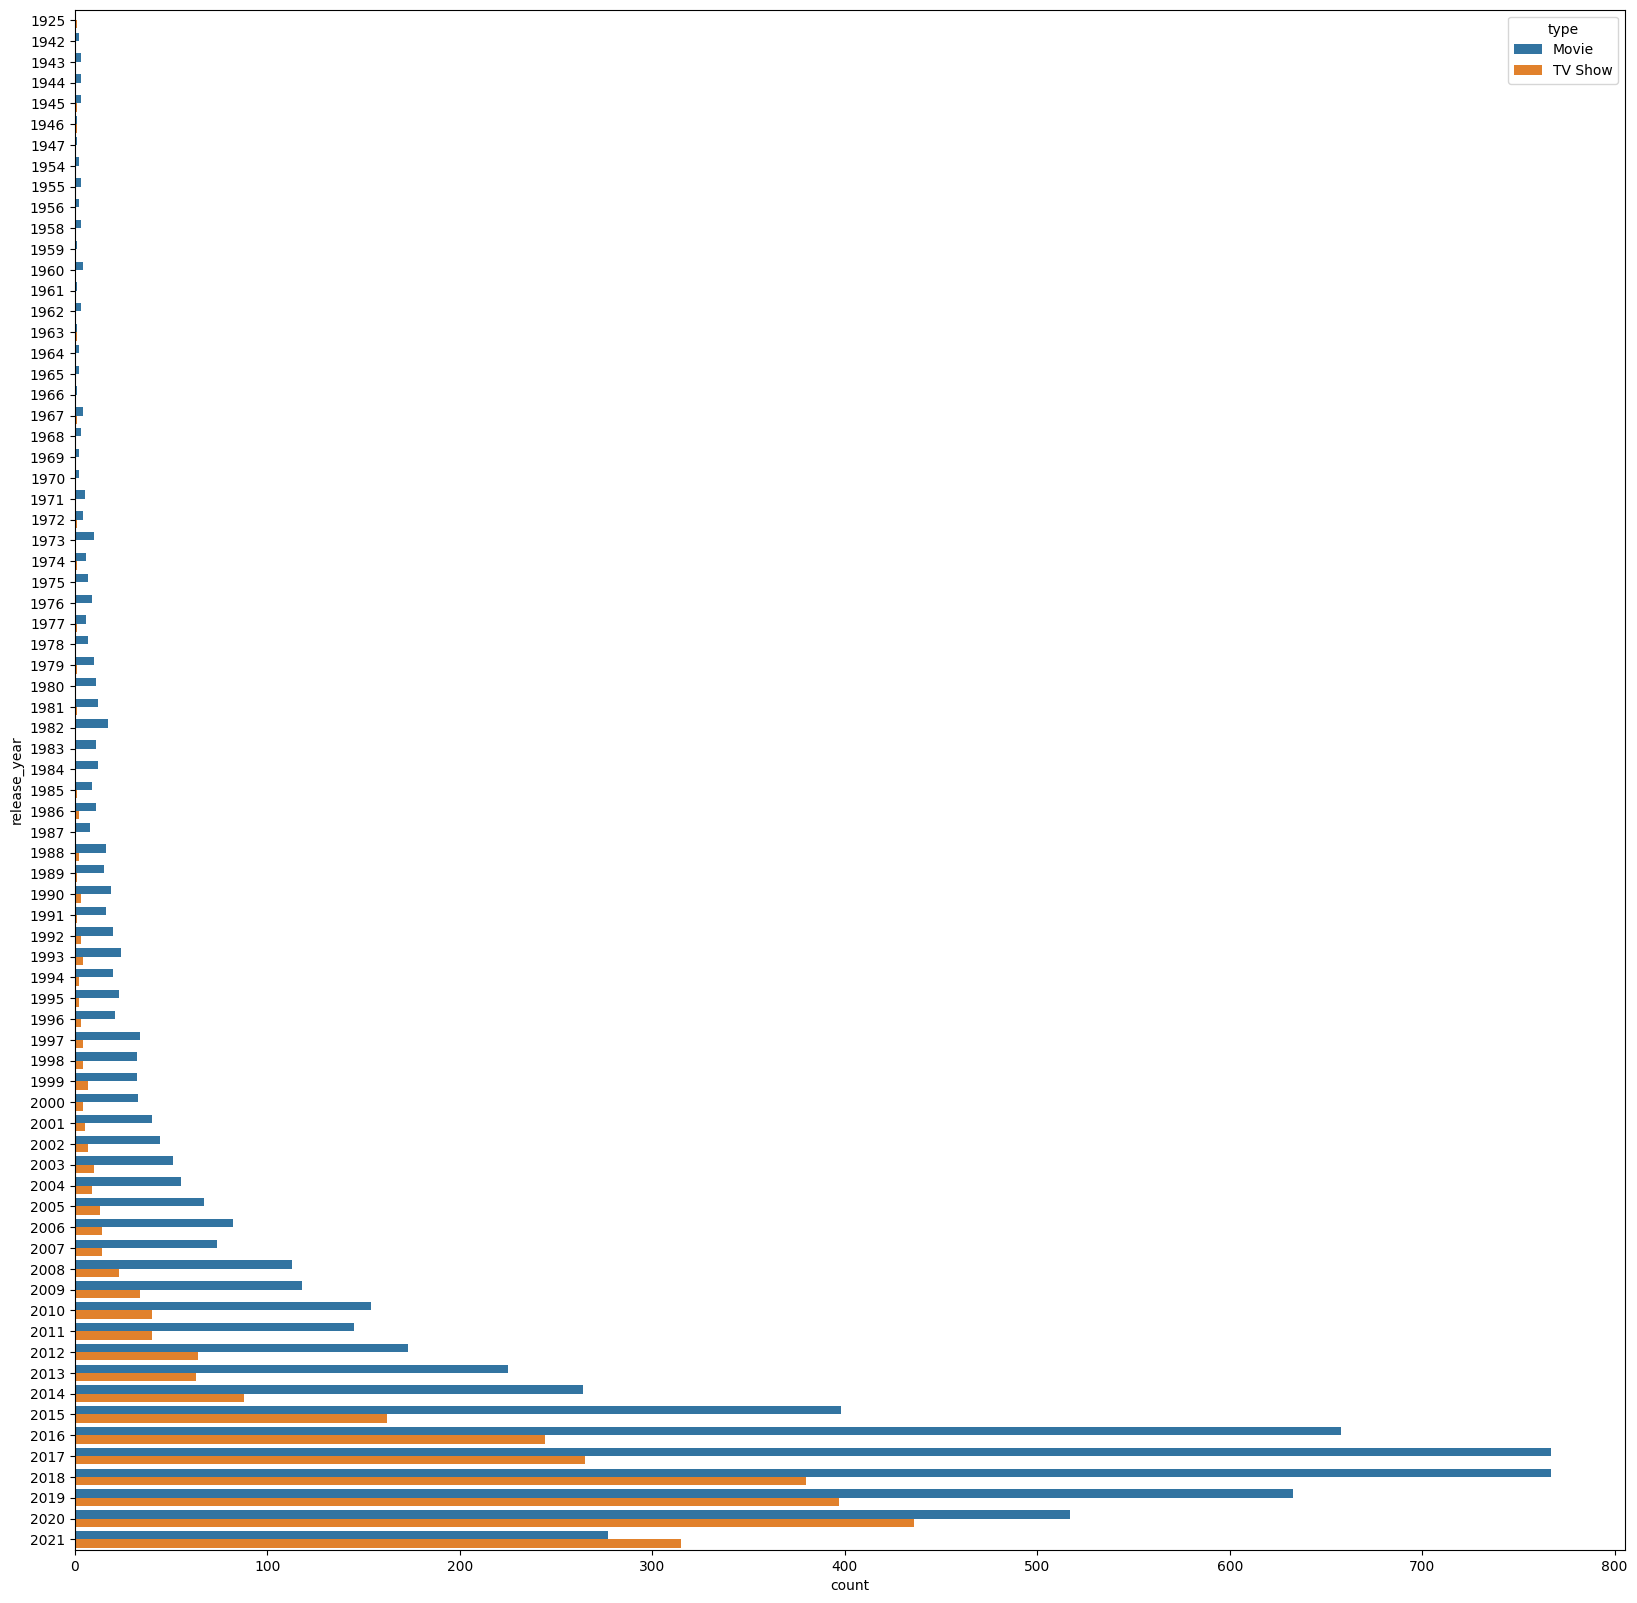

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(y="release_year",data=nt,hue="type")

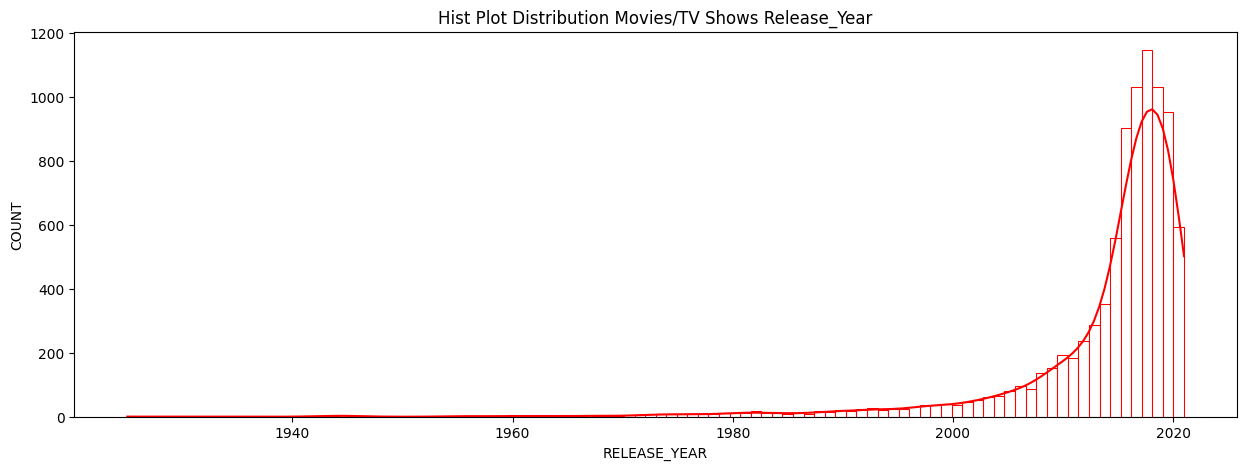

In [ ]:
#using seaborn library hist plot
plt.figure(figsize=(15,5))
sns.histplot(x="release_year",data=nt,bins=100,kde=True,color="red",fill=False)
plt.ylabel("COUNT")
plt.xlabel("RELEASE_YEAR")
plt.title("Hist Plot Distribution Movies/TV Shows Release_Year")
plt.show()

**OBSERVATION**

.We can see **left skewness** in data and presence of **ouliners** on lower end(in earlier years) and
high number of content is concentrated in recent past 4-5years on platform

.We can observe continous  growth in content on netflix in recent past years.

.***such growth probably reflect-***

.because of recent expansion of availability of services in different countries

.because of viewers taste/prefrence is towrads latest release content

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**QUERY.10-**Load the Dataset and plot the Distribution of Populartiy of different content categories using countplot


In [40]:
genre= nt["listed_in"].str.split(", ").explode().value_counts()
pd.DataFrame(genre)

,listed_in
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616


<ipython-input-46-0724f0fc2a14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre.values, y=genre.index,palette="inferno")


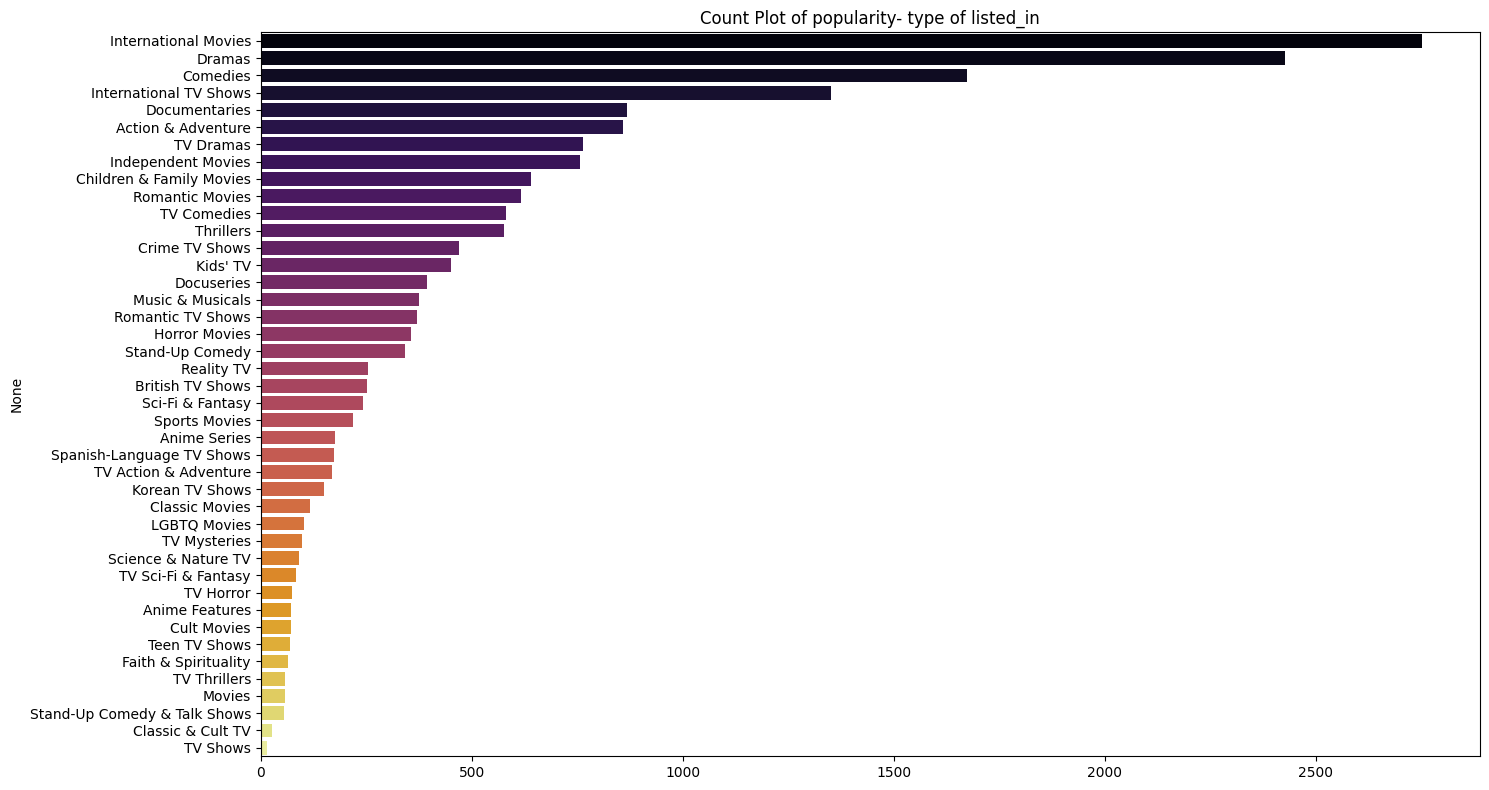

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(x=genre.values, y=genre.index,palette="inferno")
plt.title("Count Plot of popularity- type of listed_in")
plt.tight_layout()
plt.show()

**OBSERVATION**

We can observe from plot **International Movies** And **Dramas** has the highest count of content followed by **Comedy** genre and **International TVshows.**

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# SUMMARY ANALYSIS

1.The dataset comprises **8807 rows and 12 columns**, with a total of 105684 elements. Among the columns, 6 have missing values, with "director" having the highest null rate of 29.9% and "duration" the lowest at 0.03%.

2.**United States and India contribute approximately 60% to the top 10 countries** listed in the dataset. The most common genre, "Dramas, International Movies," contains 362 content items.

3.***The dataset contains a total of 514 unique combinations of genres. "International Movies" is the most common genre, with 2752 content items, contributing 30% to the top genre.***

>**The dataset includes two content types: "TV Shows" and "Movies," with "Movies" comprising approximately 70% of the total content.**



4.The data shows ***left skewness with outliers on the lower end** (in earlier years), and a concentration of content in recent years, ***indicating continuous growth in content on Netflix, possibly due to expansion into new countries and viewer preference for recent releases.**

>**Precise interpretation of DURATION values is challenging due to the varied nature of content types (movies vs. TV shows) and lack of clarity on the unit of measurement for TV shows.**


5.**From the plot, "International Movies" and "Dramas" are the most prevalent genres, followed by "Comedy" and "International TV Shows." Overall, content popularity is assessed primarily based on the count of listed genres.**

>>**In conclusion, the dataset provides insights into the distribution of content genres, content types, country associations, and durations on Netflix. The observations suggest a trend of continuous growth in content, with certain genres and countries dominating the platform. However, further analysis may be needed to understand the factors driving content popularity in more depth.**